<a href="https://colab.research.google.com/github/werowe/HypatiaAcademy/blob/master/ml/2025_04_01_scikit_learn_scipy_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Linear Regression Using Python

**simple**--one input variable.  one one feature
**multiple regression**--means multiple input variables.  mutiple features

example
price of eggs--function of:

1. cost of fuel
2. cost of electricity
3. mortality rate
4. labor costs
5. taxes

a * x1 + b * x2 + ... + e * x5 + b = f(X) = predictive model for the price of eggs


## Tools

Google Sheets--simple

* scikit-learn-use MSE
* scipy-use MSE
* TensorFlow/Keras-neural networks
* PyTorch-neural networks


In [1]:
import io
import numpy as np

a='''
1.2
1.4
1.6
2.1
2.3
3
3.1
3.3
3.3
3.8
4
4.1
4.1
4.2
4.6
5
5.2
5.4
6
6.1
6.9
7.2
8
8.3
8.8
9.1
9.6
9.7
10.4
10.6
'''


b='''
39344
46206
37732
43526
39892
56643
60151
54446
64446
57190
63219
55795
56958
57082
61112
67939
66030
83089
81364
93941
91739
98274
101303
113813
109432
105583
116970
112636
122392
121873
'''


x = np.genfromtxt(io.StringIO(a), dtype=np.float32, delimiter="\n")

y = np.genfromtxt(io.StringIO(b), dtype=int)

In [9]:
x.ndim

2

In [10]:
x[0].ndim

1

In [3]:
y

array([ 39344,  46206,  37732,  43526,  39892,  56643,  60151,  54446,
        64446,  57190,  63219,  55795,  56958,  57082,  61112,  67939,
        66030,  83089,  81364,  93941,  91739,  98274, 101303, 113813,
       109432, 105583, 116970, 112636, 122392, 121873])

We have 30 independent variables x and 30 dependent variables y

In [8]:
# print side-by-side t0 make easier to see
np.set_printoptions(suppress=True)

print ("\t x \t\t y")
np.column_stack([x,y])

	 x 		 y


array([[     1.20000005,  39344.        ],
       [     1.39999998,  46206.        ],
       [     1.60000002,  37732.        ],
       [     2.0999999 ,  43526.        ],
       [     2.29999995,  39892.        ],
       [     3.        ,  56643.        ],
       [     3.0999999 ,  60151.        ],
       [     3.29999995,  54446.        ],
       [     3.29999995,  64446.        ],
       [     3.79999995,  57190.        ],
       [     4.        ,  63219.        ],
       [     4.0999999 ,  55795.        ],
       [     4.0999999 ,  56958.        ],
       [     4.19999981,  57082.        ],
       [     4.5999999 ,  61112.        ],
       [     5.        ,  67939.        ],
       [     5.19999981,  66030.        ],
       [     5.4000001 ,  83089.        ],
       [     6.        ,  81364.        ],
       [     6.0999999 ,  93941.        ],
       [     6.9000001 ,  91739.        ],
       [     7.19999981,  98274.        ],
       [     8.        , 101303.        ],
       [   

In [ ]:
x.shape,y.shape

((30,), (30,))

# Reshape input to fit Regression API

Correct shape for regression (n_samples, n_features)

x.reshape(-1, 1) converts a 1D array of shape (n,) into a 2D array of shape (n, 1) (a column vector).

```
reshape(-1, 1)
```

**-1** means second dimension should have one colums

**1** Specifies that the second dimension (number of columns) should have exactly 1 column.


In [5]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score


x

array([ 1.2,  1.4,  1.6,  2.1,  2.3,  3. ,  3.1,  3.3,  3.3,  3.8,  4. ,
        4.1,  4.1,  4.2,  4.6,  5. ,  5.2,  5.4,  6. ,  6.1,  6.9,  7.2,
        8. ,  8.3,  8.8,  9.1,  9.6,  9.7, 10.4, 10.6], dtype=float32)

In [7]:
x=x.reshape(-1,1)

print(x.shape)

y=y.reshape(-1,1)

print(y.shape)

(30, 1)
(30, 1)


In [ ]:
y

array([[ 39344],
       [ 46206],
       [ 37732],
       [ 43526],
       [ 39892],
       [ 56643],
       [ 60151],
       [ 54446],
       [ 64446],
       [ 57190],
       [ 63219],
       [ 55795],
       [ 56958],
       [ 57082],
       [ 61112],
       [ 67939],
       [ 66030],
       [ 83089],
       [ 81364],
       [ 93941],
       [ 91739],
       [ 98274],
       [101303],
       [113813],
       [109432],
       [105583],
       [116970],
       [112636],
       [122392],
       [121873]])

x must be array of shape(n_samples,n_features)

30 samples
1 feature

the shape we have now is: (30,)

it needs to be (30,1)

# the model

but now we are doing machine learning programming in Python

1. instaniate a model `reg = linear_model.LinearRegression(fit_intercept=True)`

2. train a model-means find the solution, find the coefficients and the bias, `reg.fit(x,y)`

3. make predictions `preds = reg.predict(x)`



In [11]:



reg = linear_model.LinearRegression(fit_intercept=True)

reg.fit(x,y)

print("coefficient ", reg.coef_[0])
print("intercept ", reg.intercept_)



coefficient  [9449.962]
intercept  [24848.21]


Remember in google sheets once we had m = reg.coef_[0] and b = reg.intercept_

then in google sheets we wrote = ŷ = mx + b



In [13]:
preds = reg.predict(x)

np.column_stack([x,y,preds])

array([[     1.20000005,  39344.        ,  36188.1640625 ],
       [     1.39999998,  46206.        ,  38078.15625   ],
       [     1.60000002,  37732.        ,  39968.1484375 ],
       [     2.0999999 ,  43526.        ,  44693.1328125 ],
       [     2.29999995,  39892.        ,  46583.125     ],
       [     3.        ,  56643.        ,  53198.09765625],
       [     3.0999999 ,  60151.        ,  54143.09375   ],
       [     3.29999995,  54446.        ,  56033.0859375 ],
       [     3.29999995,  64446.        ,  56033.0859375 ],
       [     3.79999995,  57190.        ,  60758.06640625],
       [     4.        ,  63219.        ,  62648.05859375],
       [     4.0999999 ,  55795.        ,  63593.0546875 ],
       [     4.0999999 ,  56958.        ,  63593.0546875 ],
       [     4.19999981,  57082.        ,  64538.05078125],
       [     4.5999999 ,  61112.        ,  68318.03125   ],
       [     5.        ,  67939.        ,  72098.015625  ],
       [     5.19999981,  66030.        

## R-squared score (R²)
also called the **coefficient of determination**, explains the variance in the dependent (target) variable. It provides insight into the goodness-of-fit of the model.

*	R² = 1 : The model perfectly predicts the target variable, meaning all data points lie exactly on the regression line. Or, equivalently, the MSE is zero.

*	R² = 0: The model explains none of the variance in the target variable; it performs no better than simply predicting the mean of the target variable.

*	R² < 0: The model performs worse than predicting the mean, indicating a poor fit.

## Mean Square Error**

$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$

* $\hat{y}_i$ : prediction
* $y_i$ : observation



In [14]:

mse = mean_squared_error(y, preds)

r2 = r2_score(y, preds)

# Print metrics
print(f"Mean Squared Error (MSE): {mse:.4f}")

print(f"R-squared (R²): {r2:.4f}")

# R2 is close to 1 to the model almost perfectly predicts the solution


Mean Squared Error (MSE): 31270950.0000
R-squared (R²): 0.9570


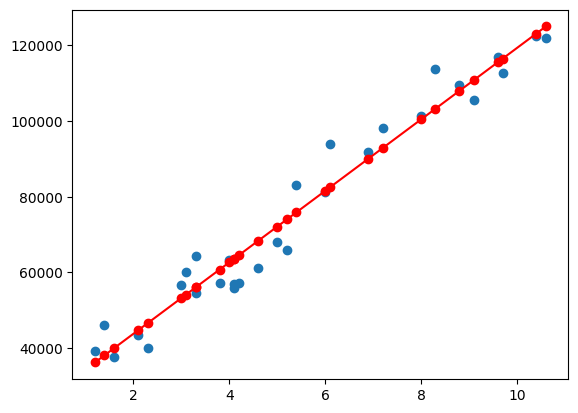

In [18]:



import matplotlib.pyplot as plt


fig, ax = plt.subplots()

#ax.plot(x,y, marker="o")

ax.scatter(x,y, marker="o")

ax.plot(x,preds, marker="o", color="red")



#ax.plot(x,z, marker="o")

plt.show()


# Homework


do what I did above:

1.  just use sthe data that had in google sheets
2.  use multiple regression



#.  GO get some data

house prices =

1. income
2. postal codes
3. the number of rooms
4. the total number of square meters






In [19]:
# Diana's example

import pandas as pd

url = "https://raw.githubusercontent.com/Diana241099/Python/main/USA_Housing.csv"
df = pd.read_csv(url)
df.head()



,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [20]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB



# The difficult part

will to create the array X with shape (number of samples, number of features)


1.  take your input data which is going to be in Pandas.  Convert the features to Pandas series then use .values to convert each to an array.  Then combine each array x1, x2, .... into X.  Then use reshape() so that it will work with:

2.  is equal to you dependent variable


3.  the regression model will solve for this:

y = MX + b here M and X are arrays with more than one dimension

From the price of eggs example we had this model:

a * x1 + b * x2 + ... + e * x5 + b = f(X) = predictive model for the price of eggs

in which case M = [a,b,c,d,e] and X=[x1,x2,x3,x4,x5] and y is the price of eggs


```

reg = linear_model.LinearRegression(fit_intercept=True)

reg.fit(X,y)

```

# Where to get data

# Suitable Datasets on Kaggle for Teaching Multiple Linear Regression

Here are some suitable datasets available on Kaggle for teaching multiple linear regression, along with brief descriptions of their features:

## Recommended Datasets

1. **50 Startups Dataset**  
   - Predict startup profits based on variables like R&D spending, administration costs, marketing spending, and state location.  
   [Link to dataset](https://www.kaggle.com/datasets)

2. **Marketing Linear Regression Dataset**  
   - Focuses on marketing-related data to predict outcomes using multiple independent variables.  
   [Link to dataset](https://www.kaggle.com/datasets)

3. **Price Prediction Dataset**  
   - Data related to car prices with variables such as model, year, selling price, showroom price, kilometers driven, fuel type, seller type, transmission type, and previous owners.  
   [Link to dataset](https://www.kaggle.com/datasets)

4. **Student Performance Dataset**  
   - Contains 10,000 student records with predictors like study hours and other variables impacting performance index.  
   [Link to dataset](https://www.kaggle.com/datasets)

5. **Housing Case Study Dataset**  
   - Predict house prices using features such as square footage, number of bedrooms/bathrooms, and location.  
   [Link to dataset](https://www.kaggle.com/datasets)

6. **Fish Market Dataset**  
   - Analyze fish species characteristics (weight, length, height, width) for regression tasks related to market pricing.  
   [Link to dataset](https://www.kaggle.com/datasets)

7. **Red Wine Quality Dataset**  
   - Explore the relationship between chemical properties of wine (acidity, sugar content, alcohol level) and its quality rating.  
   [Link to dataset](https://www.kaggle.com/datasets)

8. **Medical Insurance Costs Dataset**  
   - Predict insurance charges based on age, gender, BMI, smoker status, region, and other factors.  
   [Link to dataset](https://www.kaggle.com/datasets)

9.





In [36]:
x1=df['Avg. Area Income'].values



In [27]:
x2=df['Avg. Area Number of Bedrooms'].values

In [29]:
y=df['Price'].values

In [33]:
X=np.array([x1,x2])
X.shape

(2, 5000)